In [1]:
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [2]:
def convole(image, K):
    (iH,iW) = image.shape[:2]
    (kH, kW) = K.shape[:2]
    pad = (kW-1)//2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype='float')
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            k = (roi * K).sum()
            output[y - pad, x - pad] = k
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

In [3]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))

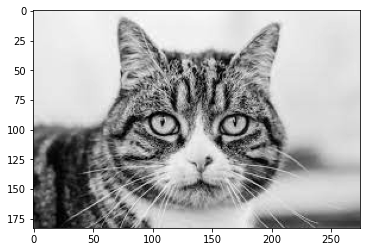

In [4]:
image  = cv2.imread('images.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

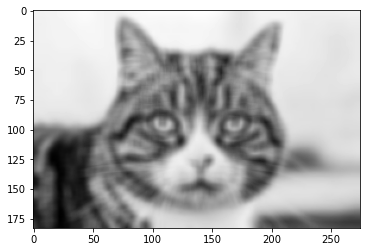

In [5]:
output = convole(gray, smallBlur)
plt.imshow(output, cmap = 'gray')